# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [18]:
taxi_df = pd.read_csv(r"D:\PROJECTS\hypotest\tripdata.csv")

In [19]:
taxi_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [20]:
taxi_df.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0
6405007,NaN,2020-01-31 22:44:00,2020-01-31 23:06:00,NaN,11.60,NaN,NaN,179,205,NaN,54.56,2.75,0.5,0.0,0.00,0.3,58.11,0.0


In [21]:
taxi_df.shape

(6405008, 18)

In [22]:
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])

In [23]:
taxi_df['duration'] = taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']
taxi_df['duration'] = taxi_df['duration'].dt.total_seconds()/60

In [24]:
taxi_df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [25]:
# removing unwanted columns
taxi_df.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [26]:
taxi_df.head(5)

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.2,1.0,6.0,4.800000
1,1.0,1.2,1.0,7.0,7.416667
2,1.0,0.6,1.0,6.0,6.183333
3,1.0,0.8,1.0,5.5,4.850000
4,1.0,0.0,2.0,3.5,2.300000


In [27]:
taxi_df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [28]:
print('Missing data %',round(65441/taxi_df.shape[0]*100,2))

Missing data % 1.02


In [35]:
taxi_df.dropna(inplace = True)

In [36]:
taxi_df['passenger_count'] = taxi_df['passenger_count'].astype('int64')
taxi_df['payment_type'] = taxi_df['payment_type'].astype('int64')

In [37]:
taxi_df[taxi_df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.00,2,7.0,0.000000
2441,1,0.00,1,52.0,0.200000
2446,2,1.70,1,9.5,13.066667
2465,1,0.40,1,4.0,3.083333
3344,1,1.20,1,6.0,5.350000
...,...,...,...,...,...
6339558,1,1.63,2,8.0,8.800000
6339559,1,1.81,1,8.5,8.016667
6339560,1,0.98,2,6.5,6.900000
6339562,1,2.10,1,11.0,14.233333


In [38]:
taxi_df.drop_duplicates(inplace = True)

In [40]:
taxi_df.shape

(3007861, 5)

In [41]:
taxi_df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [42]:
taxi_df['payment_type'].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

In [43]:
taxi_df = taxi_df[taxi_df['payment_type']<3]
taxi_df = taxi_df[(taxi_df['passenger_count']>0)&(taxi_df['passenger_count']<6)]

In [44]:
taxi_df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [45]:
taxi_df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,4.536729e+00,1.780567e+01,2.415478e+01
std,1.176652e+00,4.895890e+00,1.506997e+01,9.260031e+01
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2.770367e+03
25%,1.000000e+00,1.500000e+00,9.000000e+00,9.883333e+00
50%,1.000000e+00,2.730000e+00,1.300000e+01,1.573333e+01
75%,2.000000e+00,5.470000e+00,2.100000e+01,2.336667e+01
max,5.000000e+00,2.628800e+02,4.265000e+03,8.525117e+03


In [46]:
taxi_df = taxi_df[taxi_df['fare_amount']>0]
taxi_df = taxi_df[taxi_df['trip_distance']>0]
taxi_df = taxi_df[taxi_df['duration']>0]

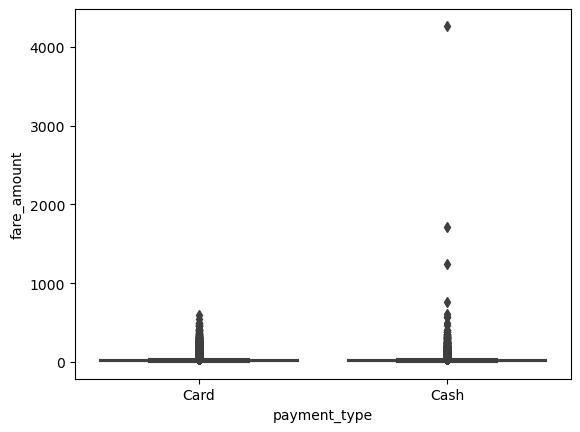

In [54]:
sns.boxplot(data=taxi_df, y="fare_amount", x="payment_type")
plt.show()

In [55]:
for col in ['trip_distance','fare_amount','duration']:
    Q1 = taxi_df[col].quantile(0.25)
    Q3 = taxi_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    taxi_df = taxi_df[(taxi_df[col] >= lower_bound) & (taxi_df[col] <= upper_bound)]

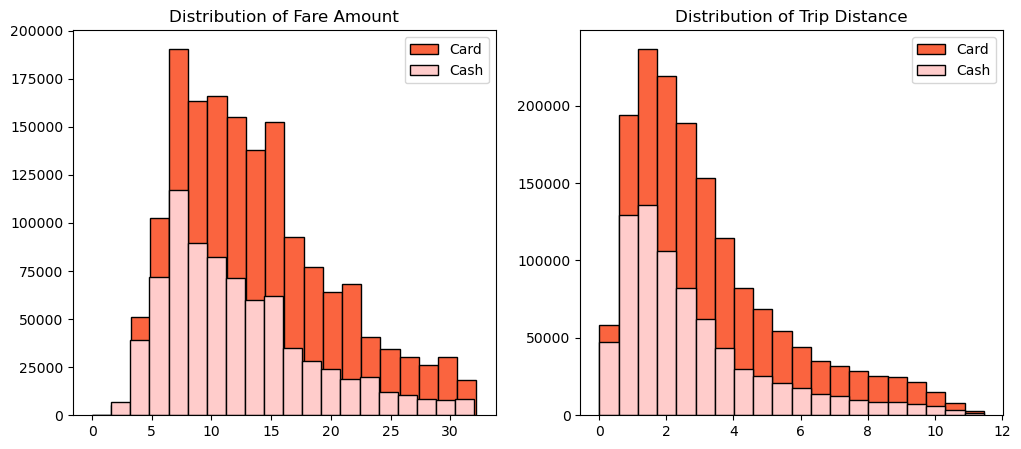

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.701903  6.506356      3.230729  2.320528
Cash           12.250209  6.246104      2.803716  2.231871

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_df[taxi_df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'Card')
plt.hist(taxi_df[taxi_df['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFCCCB',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_df[taxi_df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#FA643F',label = 'Card')
plt.hist(taxi_df[taxi_df['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#FFCCCB',label = 'Cash')
plt.legend()
plt.show()

taxi_df.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

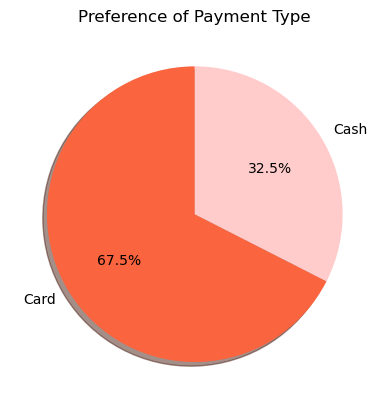

In [77]:
plt.title('Preference of Payment Type')
plt.pie(taxi_df['payment_type'].value_counts(normalize = True), labels = taxi_df['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#FA643F','#FFCCCB'])
plt.show()

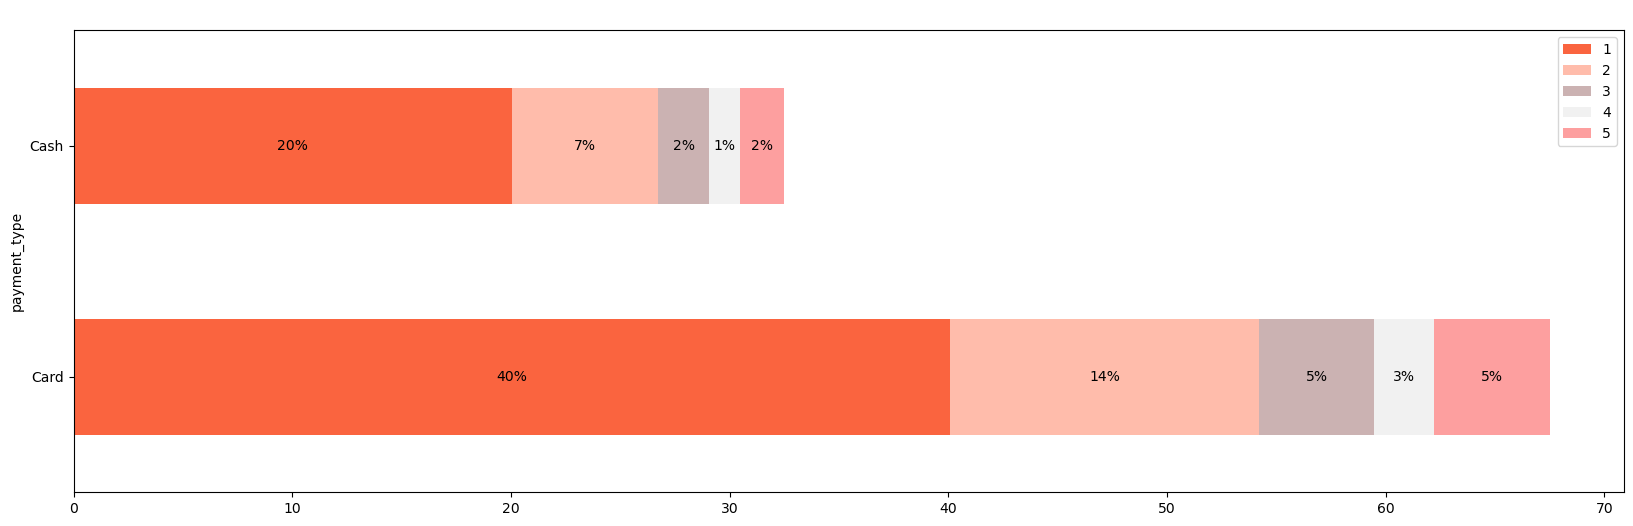

In [79]:
passenger_count = taxi_df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100

df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]

fig, ax = plt.subplots(figsize=(20, 6)) 
df.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'] )

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

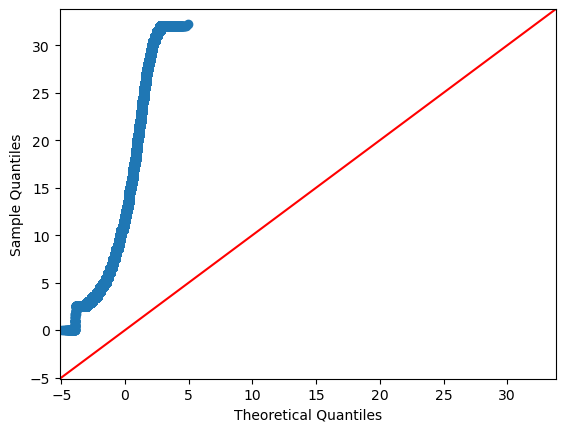

In [80]:
fig = sm.qqplot(taxi_df['fare_amount'], line='45')
plt.show()

In [83]:
credit_card = taxi_df[taxi_df['payment_type'] == 'Card']['fare_amount']

cash = taxi_df[taxi_df['payment_type'] == 'Cash']['fare_amount']

t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 165.59915491544626, P-value: 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than the significance level of 5%, we will reject the null hypothesis.

You conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers.